In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_exact = pd.read_json("../qqe/data/sre_data_quimb_exact.json")
df_fwht = pd.read_json("../qqe/data/sre_data_quimb_fwht.json")

In [3]:
df_exact

,cid,family,n_qubits,n_layers,seed,SRE
0,haar_Q4_L1_S2528957426,haar,4,1,2528957426,1.341156
1,haar_Q4_L3_S198578551,haar,4,3,198578551,2.264186
2,haar_Q4_L5_S2968487822,haar,4,5,2968487822,2.368156
3,haar_Q4_L7_S638108947,haar,4,7,638108947,2.256927
4,haar_Q4_L9_S3408018218,haar,4,9,3408018218,2.405952
...,...,...,...,...,...,...
4995,haar_Q10_L41_S1184474633,haar,10,41,1184474633,8.007313
4996,haar_Q10_L43_S1906239143,haar,10,43,1906239143,8.000887
4997,haar_Q10_L45_S3870827564,haar,10,45,3870827564,8.003202
4998,haar_Q10_L47_S2345769539,haar,10,47,2345769539,7.996238


In [4]:
df_fwht

,cid,family,n_qubits,n_layers,seed,SRE
0,haar_Q4_L1_S2528957426,haar,4,1,2528957426,1.341156
1,haar_Q4_L3_S198578551,haar,4,3,198578551,2.264186
2,haar_Q4_L5_S2968487822,haar,4,5,2968487822,2.368156
3,haar_Q4_L7_S638108947,haar,4,7,638108947,2.256927
4,haar_Q4_L9_S3408018218,haar,4,9,3408018218,2.405952
...,...,...,...,...,...,...
19995,haar_Q10_L91_S2261474171,haar,10,91,2261474171,8.002057
19996,haar_Q10_L93_S736416146,haar,10,93,736416146,8.003670
19997,haar_Q10_L95_S2701004567,haar,10,95,2701004567,8.001590
19998,haar_Q10_L97_S1175946542,haar,10,97,1175946542,8.005139


In [5]:
agg_exact = (
    df_exact
    .groupby(["n_qubits", "n_layers"])
    .agg(
        SRE_mean=("SRE", "mean"),
        SRE_std=("SRE", "std"),
    )
    .reset_index()
)

In [6]:
agg_exact

,n_qubits,n_layers,SRE_mean,SRE_std
0,4,1,1.638812,0.276701
1,4,3,2.137281,0.165492
2,4,5,2.260548,0.165514
3,4,7,2.250746,0.115117
4,4,9,2.244083,0.117979
...,...,...,...,...
95,10,41,8.004500,0.003357
96,10,43,8.003883,0.003861
97,10,45,8.004896,0.003406
98,10,47,8.004131,0.003422


In [7]:
def plot_layers_for_each_n(agg):
    for n in sorted(agg["n_qubits"].unique()):
        sub = agg[agg["n_qubits"] == n]

        plt.errorbar(
            sub["n_layers"],
            sub["SRE_mean"],
            yerr=sub["SRE_std"],
            marker="o",
            linestyle="-",
            capsize=3,
            label=f"n={n}",
        )


In [8]:
def plot_qubits_for_each_L(agg, chosen_layers):
    for L in chosen_layers:
        sub = agg[agg["n_layers"] == L]
        plt.errorbar(
            sub["n_qubits"],
            sub["SRE_mean"],
            yerr=sub["SRE_std"],
            marker="s",
            linestyle="-",
            capsize=3,
            label=f"L={L}",
        )

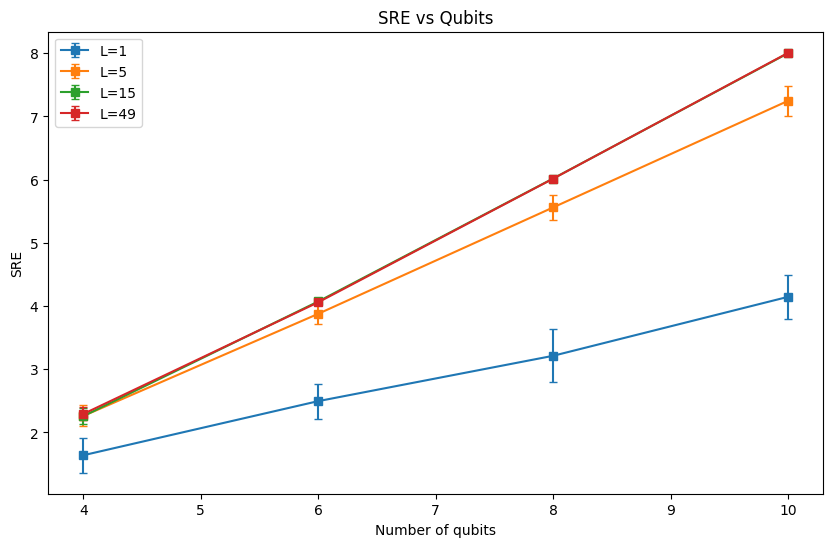

In [9]:
plt.figure(figsize=(10, 6))
plot_qubits_for_each_L(agg_exact, chosen_layers=[1, 5, 15, 49])
plt.title(f"SRE vs Qubits")
plt.xlabel("Number of qubits")
plt.ylabel("SRE")
plt.legend()
plt.show()

In [10]:
x, y = df_exact["n_qubits"], df_exact["SRE"]

In [11]:
q = np.array(df_exact["n_qubits"])
print(q)
x = np.array(df_exact["n_layers"])
print(x)
y = np.array(df_exact["SRE"])
print(y)

[ 4  4  4 ... 10 10 10]
[ 1  3  5 ... 45 47 49]
[1.34115589 2.26418634 2.36815619 ... 8.00320188 7.99623835 8.00711769]


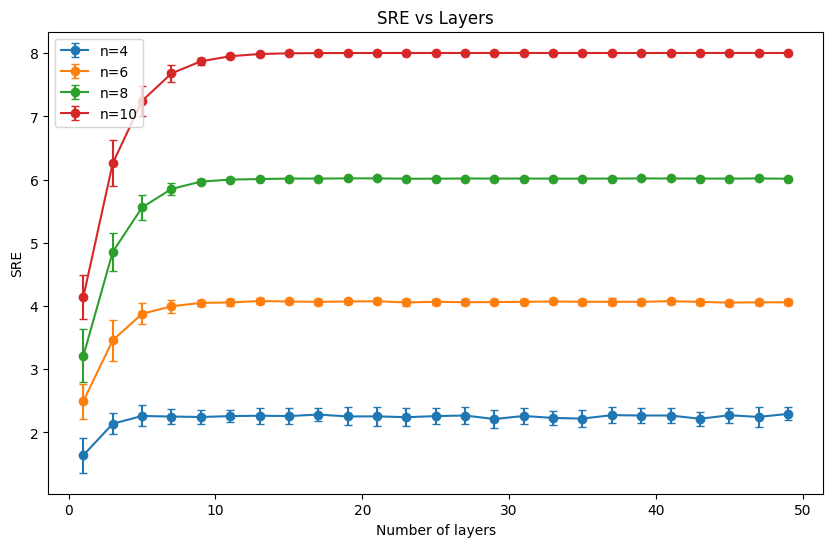

In [12]:
plt.figure(figsize=(10, 6))
plot_layers_for_each_n(agg_exact)
plt.title(f"SRE vs Layers")
plt.xlabel("Number of layers")
plt.ylabel("SRE")
plt.legend()
plt.show()

In [13]:
real_SRE_haar = -np.log2(4 / (2 ** df_exact["n_qubits"] + 3))
computed_SRE_haar = df_exact["SRE"]

In [14]:
real_SRE_haar

0       2.247928
1       2.247928
2       2.247928
3       2.247928
4       2.247928
          ...   
4995    8.004220
4996    8.004220
4997    8.004220
4998    8.004220
4999    8.004220
Name: n_qubits, Length: 5000, dtype: float64

In [15]:
computed_SRE_haar

0       1.341156
1       2.264186
2       2.368156
3       2.256927
4       2.405952
          ...   
4995    8.007313
4996    8.000887
4997    8.003202
4998    7.996238
4999    8.007118
Name: SRE, Length: 5000, dtype: float64

In [16]:
for real, computed, n_qubits in zip(real_SRE_haar, computed_SRE_haar, df_exact["n_qubits"]):
    print(f"n_qubits: {n_qubits}, Real: {real}, Computed: {computed}, Difference: {abs(real - computed)}")

n_qubits: 4, Real: 2.2479275134435857, Computed: 1.3411558863, Difference: 0.9067716271435857
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.2641863423, Difference: 0.016258828856414276
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.3681561897, Difference: 0.12022867625641442
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.256926972, Difference: 0.008999458556414375
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.4059520798, Difference: 0.15802456635641438
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.3611835325, Difference: 0.11325601905641447
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.1811220977, Difference: 0.06680541574358578
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.1274794825, Difference: 0.12044803094358558
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.4683256734, Difference: 0.2203981599564142
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.3587323613, Difference: 0.11080484785641431
n_qubits: 4, Real: 2.2479275134435857, Computed: 2.

In [17]:
SRE = pd.DataFrame(
    {
        "n_qubits": df_exact["n_qubits"],
        "real_SRE_haar": real_SRE_haar,
        "computed_SRE_haar": computed_SRE_haar,
    }
)

In [18]:
SRE

,n_qubits,real_SRE_haar,computed_SRE_haar
0,4,2.247928,1.341156
1,4,2.247928,2.264186
2,4,2.247928,2.368156
3,4,2.247928,2.256927
4,4,2.247928,2.405952
...,...,...,...
4995,10,8.004220,8.007313
4996,10,8.004220,8.000887
4997,10,8.004220,8.003202
4998,10,8.004220,7.996238


In [19]:
import time

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

from qqe.GNN.physics_aware_NN import Parameters_Net

In [20]:
df_exact = pd.read_json("../qqe/data/sre_data_quimb_exact.json")
df_fwht = pd.read_json("../qqe/data/sre_data_quimb_fwht.json")

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
df_fwht

,cid,family,n_qubits,n_layers,seed,SRE
0,haar_Q4_L1_S2528957426,haar,4,1,2528957426,1.341156
1,haar_Q4_L3_S198578551,haar,4,3,198578551,2.264186
2,haar_Q4_L5_S2968487822,haar,4,5,2968487822,2.368156
3,haar_Q4_L7_S638108947,haar,4,7,638108947,2.256927
4,haar_Q4_L9_S3408018218,haar,4,9,3408018218,2.405952
...,...,...,...,...,...,...
19995,haar_Q10_L91_S2261474171,haar,10,91,2261474171,8.002057
19996,haar_Q10_L93_S736416146,haar,10,93,736416146,8.003670
19997,haar_Q10_L95_S2701004567,haar,10,95,2701004567,8.001590
19998,haar_Q10_L97_S1175946542,haar,10,97,1175946542,8.005139


In [23]:
new_df_fwht = df_fwht.drop(columns=["cid", "seed", "family"])

In [24]:
X = (new_df_fwht["n_layers"]/new_df_fwht["n_qubits"]).to_numpy(dtype=np.float32)
y = (new_df_fwht["SRE"]/new_df_fwht["n_qubits"]).to_numpy(dtype=np.float32)

In [25]:
X = X.reshape(-1, 1)

In [26]:
y

array([0.33528897, 0.5660466 , 0.59203905, ..., 0.80015904, 0.8005139 ,
       0.8006352 ], shape=(20000,), dtype=float32)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,
)

In [28]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42,
)

In [29]:
# training_data = torch.tensor(train_df[["n_qubits", "n_layers"]].values, dtype=torch.float32).to(device)
# training_labels = torch.tensor(train_df["SRE"].values, dtype=torch.float32).to(device)

# test_data = torch.tensor(test_df[["n_qubits", "n_layers"]].values, dtype=torch.float32).to(device)
# test_labels = torch.tensor(test_df["SRE"].values, dtype=torch.float32).to(device)

In [30]:
train_ds = torch.utils.data.TensorDataset(
    torch.from_numpy(X_train),
    torch.from_numpy(y_train).unsqueeze(1)   # optional shape (N,1)
)

test_ds = torch.utils.data.TensorDataset(
    torch.from_numpy(X_test),
    torch.from_numpy(y_test).unsqueeze(1)
)

valid_ds = torch.utils.data.TensorDataset(
    torch.from_numpy(X_validation),
    torch.from_numpy(y_validation).unsqueeze(1)
)

In [31]:
training_loader = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader     = torch.utils.data.DataLoader(test_ds, batch_size=16, shuffle=False)
valid_loader    = torch.utils.data.DataLoader(valid_ds, batch_size=16, shuffle=False)

In [32]:
def train_one_epoch(model, loader, optimizer, loss_fn):
    model.train()
    total_loss = 0.0
    n=0
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device).float(), y_batch.to(device).float().view(-1, 1)

        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = loss_fn(predictions, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X_batch.size(0)
        n += X_batch.size(0)

    return total_loss / n

In [33]:
def evaluate(model, loader, loss_fn):
    model.eval()
    total, n = 0.0, 0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device).float()
            y = y.to(device).float().view(-1, 1)
            pred = model(x)
            loss = loss_fn(pred, y)
            total += loss.item() * x.size(0)
            n += x.size(0)
    return total / n

In [34]:
def train_model(model, training_loader, valid_loader, optimizer, loss_fn, epochs=5):
    t1 = time.time()
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, training_loader, optimizer, loss_fn)
        train_losses.append(train_loss)
        model.eval()
        valid_loss = 0.0
        n_val = 0
        with torch.no_grad():
            for X_val, y_val in valid_loader:
                X_val, y_val = X_val.to(device).float(), y_val.to(device).float().view(-1, 1)
                predictions = model(X_val)
                loss = loss_fn(predictions, y_val)
                valid_loss += loss.item() * X_val.size(0)
                n_val += X_val.size(0)
        valid_loss /= n_val
        val_losses.append(valid_loss)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")
        t2 = time.time()
        print(f"Training for epoch {epoch+1} took {t2 - t1:.2f} seconds")
    return train_losses, val_losses


In [35]:
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

In [36]:
model = Parameters_Net()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [37]:
train_losses, val_losses = train_model(model, training_loader, valid_loader, optimizer, loss_fn, epochs=10)

Epoch 1/10, Train Loss: 0.0434, Valid Loss: 0.0082
Training for epoch 1 took 0.74 seconds
Epoch 2/10, Train Loss: 0.0074, Valid Loss: 0.0067
Training for epoch 2 took 1.42 seconds
Epoch 3/10, Train Loss: 0.0067, Valid Loss: 0.0064
Training for epoch 3 took 2.12 seconds
Epoch 4/10, Train Loss: 0.0064, Valid Loss: 0.0062
Training for epoch 4 took 2.83 seconds
Epoch 5/10, Train Loss: 0.0063, Valid Loss: 0.0061
Training for epoch 5 took 3.50 seconds
Epoch 6/10, Train Loss: 0.0062, Valid Loss: 0.0060
Training for epoch 6 took 4.13 seconds
Epoch 7/10, Train Loss: 0.0061, Valid Loss: 0.0061
Training for epoch 7 took 4.78 seconds
Epoch 8/10, Train Loss: 0.0061, Valid Loss: 0.0060
Training for epoch 8 took 5.38 seconds
Epoch 9/10, Train Loss: 0.0060, Valid Loss: 0.0060
Training for epoch 9 took 6.10 seconds
Epoch 10/10, Train Loss: 0.0060, Valid Loss: 0.0059
Training for epoch 10 took 6.73 seconds


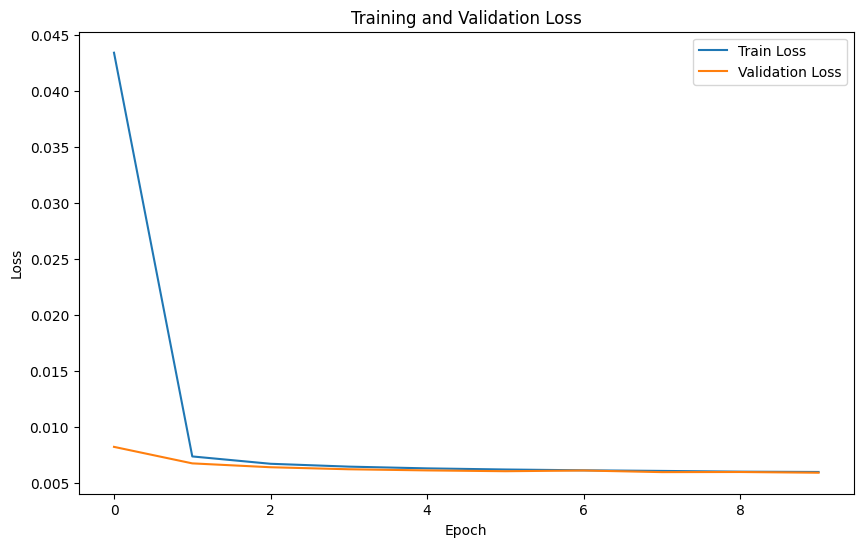

In [38]:
plot_losses(train_losses, val_losses)

In [39]:
test_loss = evaluate(model, test_loader, loss_fn)
print("FINAL TEST LOSS:", test_loss)

FINAL TEST LOSS: 0.005884147498756647
